# 8장. 텍스트 빈도 분석 (1)영어단어분석

### - 자연어처리패키지 nltk download

In [1]:
import nltk

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
nltk.download()

#### -----------------------------------------------------------------

# 4. 데이터 준비

In [2]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

## 데이터 조합 – 파일 병합하기

In [3]:
all_files = glob.glob('8장_data/myCabinetExcelData*.xls')
all_files #출력하여 내용 확인

['8장_data\\myCabinetExcelData (1).xls',
 '8장_data\\myCabinetExcelData (2).xls',
 '8장_data\\myCabinetExcelData (3).xls',
 '8장_data\\myCabinetExcelData (4).xls',
 '8장_data\\myCabinetExcelData (5).xls',
 '8장_data\\myCabinetExcelData (6).xls',
 '8장_data\\myCabinetExcelData (7).xls',
 '8장_data\\myCabinetExcelData (8).xls',
 '8장_data\\myCabinetExcelData (9).xls',
 '8장_data\\myCabinetExcelData.xls']

In [4]:
all_files_data = [] #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
    
all_files_data[0] #작업 확인용 출력

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020
1,NaN,2,"Big Data, Efficient Markets, and the End of Da...","Urbaczewski, Andrew; Elmore, Ryan",Mary Ann Leibert,2018
2,NaN,3,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,NaN,4,Call for Special Issue Papers: Internet of Med...,"Din, Sadia; Aslan, Nauman; Cheung, Simon K.S.;...",Mary Ann Leibert,2020
4,NaN,5,Big Data Literature Search,unknown,Mary Ann Leibert,2014
...,...,...,...,...,...,...
95,NaN,96,A survey on big data processing infrastructure...,"Nunna, Krishna Chaitanya; Mehdipour, Farhad; T...",Inderscience,2015
96,NaN,97,Toward Efficient and Flexible Metadata Indexin...,"Zhao, D.; Qiao, K.; Zhou, Z.; Li, T.; Lu, Z.; ...",unknown,2017
97,NaN,98,Distributed Feature Selection for Efficient Ec...,"Zhao, L.; Chen, Z.; Hu, Y.; Min, G.; Jiang, Z.",unknown,2018
98,NaN,99,A platform for big data analytics on distribut...,"Aye, Kyar Nyo; Thein, Thandar",Inderscience,2015


In [5]:
all_files_data_concat = pd.concat( all_files_data, axis = 0, ignore_index = True)
all_files_data_concat #작업 확인용 출력

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020
1,NaN,2,"Big Data, Efficient Markets, and the End of Da...","Urbaczewski, Andrew; Elmore, Ryan",Mary Ann Leibert,2018
2,NaN,3,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
3,NaN,4,Call for Special Issue Papers: Internet of Med...,"Din, Sadia; Aslan, Nauman; Cheung, Simon K.S.;...",Mary Ann Leibert,2020
4,NaN,5,Big Data Literature Search,unknown,Mary Ann Leibert,2014
...,...,...,...,...,...,...
995,NaN,96,Big data analysis of swimming pools' impact on...,"Elnakat, Afamia; Gomez, Juan D.; Roberts, Jaso...",Inderscience,2015
996,NaN,97,MonkeyKing: Adaptive Parameter Tuning on Big D...,"Du, Haizhou; Han, Ping; Xiang, Qiao; Huang, Sheng",Mary Ann Leibert,2020
997,NaN,98,Curating Big Data Made Simple: Perspectives fr...,unknown,Mary Ann Leibert,2014
998,NaN,99,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014


In [6]:
all_files_data_concat.to_csv( '8장_data/riss_bigdata.csv', encoding = 'utf-8', index = False)

## 데이터 전처리

In [7]:
all_title = all_files_data_concat['제목']
all_title #작업 확인용 출력

0      Call for Special Issue Papers: Soft Computing ...
1      Big Data, Efficient Markets, and the End of Da...
2       Big Data and Predictive Analytics in Health Care
3      Call for Special Issue Papers: Internet of Med...
4                             Big Data Literature Search
                             ...                        
995    Big data analysis of swimming pools' impact on...
996    MonkeyKing: Adaptive Parameter Tuning on Big D...
997    Curating Big Data Made Simple: Perspectives fr...
998                 Big Data 2.0: Cataclysm or Catalyst?
999    Does Medical School Training Relate to Practic...
Name: 제목, Length: 1000, dtype: object

In [8]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [9]:
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [ w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [ lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [10]:
print(words) #출력하여 내용 확인

[['call', 'special', 'issue', 'paper', 'soft', 'computing', 'model', 'big', 'data', 'internet', 'thing'], ['big', 'data', 'efficient', 'market', 'end', 'daily', 'fantasy', 'sport', 'know'], ['big', 'data', 'predictive', 'analytics', 'health', 'care'], ['call', 'special', 'issue', 'paper', 'internet', 'medical', 'thing', 'big', 'data', 'pervasive', 'medical', 'care'], ['big', 'data', 'literature', 'search'], ['big', 'data', 'ensemble', 'clinical', 'prediction', 'healthcare', 'data', 'using', 'deep', 'learning', 'model'], ['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'industrial', 'intelligence'], ['u', 'army', 'person', 'event', 'data', 'environment', 'military', 'civilian', 'big', 'data', 'enterprise'], ['exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink'], ['big', 'data', 'machine', 'analyze', 'stock', '

In [11]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #작업 확인용 출력

['call', 'special', 'issue', 'paper', 'soft', 'computing', 'model', 'big', 'data', 'internet', 'thing', 'big', 'data', 'efficient', 'market', 'end', 'daily', 'fantasy', 'sport', 'know', 'big', 'data', 'predictive', 'analytics', 'health', 'care', 'call', 'special', 'issue', 'paper', 'internet', 'medical', 'thing', 'big', 'data', 'pervasive', 'medical', 'care', 'big', 'data', 'literature', 'search', 'big', 'data', 'ensemble', 'clinical', 'prediction', 'healthcare', 'data', 'using', 'deep', 'learning', 'model', 'call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot', 'call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'industrial', 'intelligence', 'u', 'army', 'person', 'event', 'data', 'environment', 'military', 'civilian', 'big', 'data', 'enterprise', 'exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink', 'big', 'data', 'machine', 'analyze', 'stock', 'market', 'sentiment',

# 5. 데이터 탐색 및 분석 모델 구축

## 1. 데이터 탐색 - 단어 빈도 구하기

In [12]:
count = Counter(words2)
count #출력하여 내용 확인

Counter({'data': 1239,
         'big': 1112,
         'analytics': 113,
         'based': 102,
         'analysis': 97,
         'driven': 71,
         'system': 62,
         'using': 56,
         'approach': 56,
         'issue': 48,
         'learning': 48,
         'model': 46,
         'challenge': 44,
         'application': 40,
         'new': 39,
         'special': 37,
         'management': 36,
         'framework': 36,
         'algorithm': 36,
         'call': 34,
         'research': 34,
         'science': 34,
         'platform': 34,
         'paper': 32,
         'health': 31,
         'cloud': 30,
         'era': 30,
         'opportunity': 28,
         'network': 27,
         'machine': 26,
         'mining': 26,
         'processing': 26,
         'technology': 26,
         'computing': 25,
         'performance': 25,
         'method': 25,
         'earth': 25,
         'optimization': 24,
         'perspective': 24,
         'business': 24,
         'smart': 24,
   

In [13]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1239
big : 1112
analytics : 113
based : 102
analysis : 97
driven : 71
system : 62
using : 56
approach : 56
issue : 48
learning : 48
model : 46
challenge : 44
application : 40
new : 39
special : 37
management : 36
framework : 36
algorithm : 36
call : 34
research : 34
science : 34
platform : 34
paper : 32
health : 31
cloud : 30
era : 30
opportunity : 28
network : 27
machine : 26
mining : 26
processing : 26
technology : 26
computing : 25
performance : 25
method : 25
earth : 25
optimization : 24
perspective : 24
business : 24
smart : 24
distributed : 23
information : 23
use : 23
review : 22
process : 22
world : 22
intelligence : 21
service : 21
development : 20


## 2. 데이터 탐색 - 히스토그램 그리기

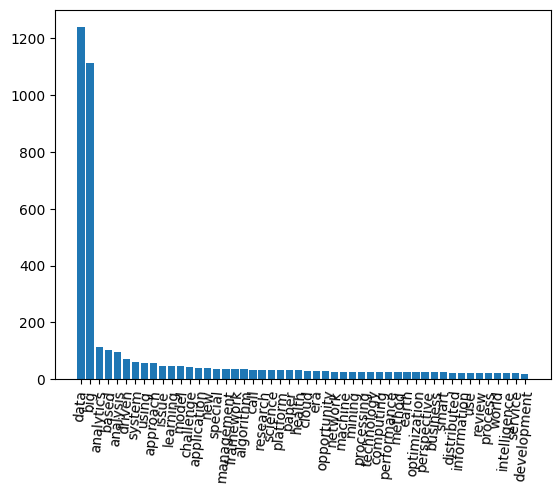

In [14]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks( range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.show()

###  - 'big', 'data'를 제외하고, 단어빈도 히스토그램 그리기

In [15]:
word_count2 = word_count
del word_count2['big']
del word_count2['data']

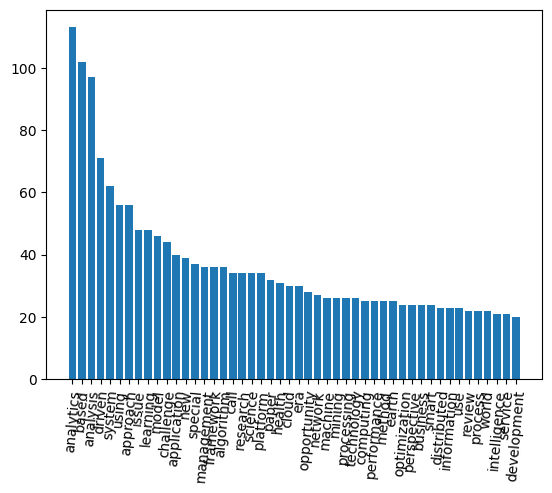

In [16]:
sorted_Keys = sorted(word_count2, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count2.values(), reverse = True)
plt.bar(range(len(word_count2)), sorted_Values, align = 'center')
plt.xticks( range(len(word_count2)), list(sorted_Keys), rotation = 85)
plt.show()

# 6. 결과 시각화

In [17]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year #작업 확인용 출력

,출판일,doc_count
0,2003,1
1,2004,1
2,2011,5
3,2012,19
4,2013,50
5,2014,124
6,2015,92
7,2016,112
8,2017,129
9,2018,118


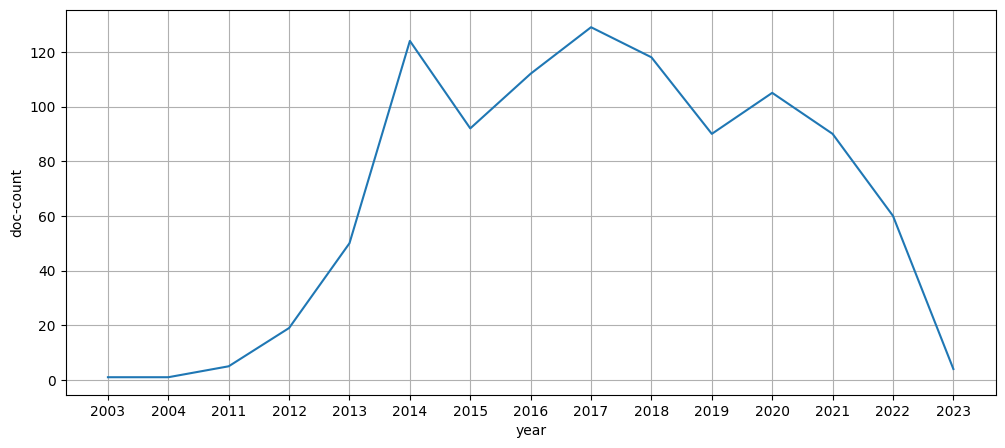

In [18]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks( range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

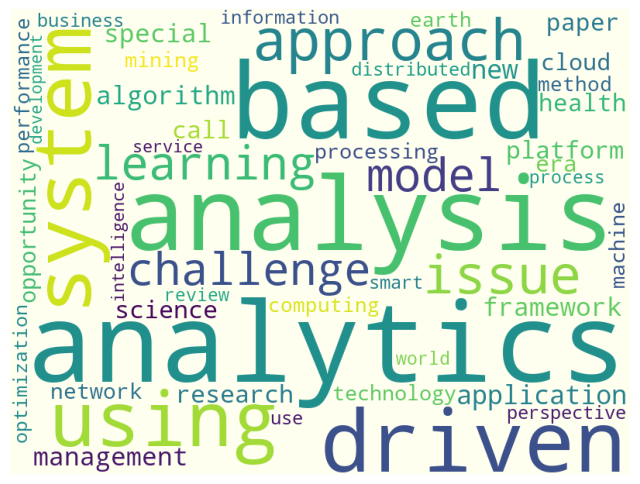

In [19]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords,width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [20]:
cloud.to_file("8장_data/riss_bigdata_wordCloud.jpg")